In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file = "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = (X_train.shape[1:])
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
sign_names = pd.read_csv("dataset/signnames.csv")
sign_names.head(2)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)


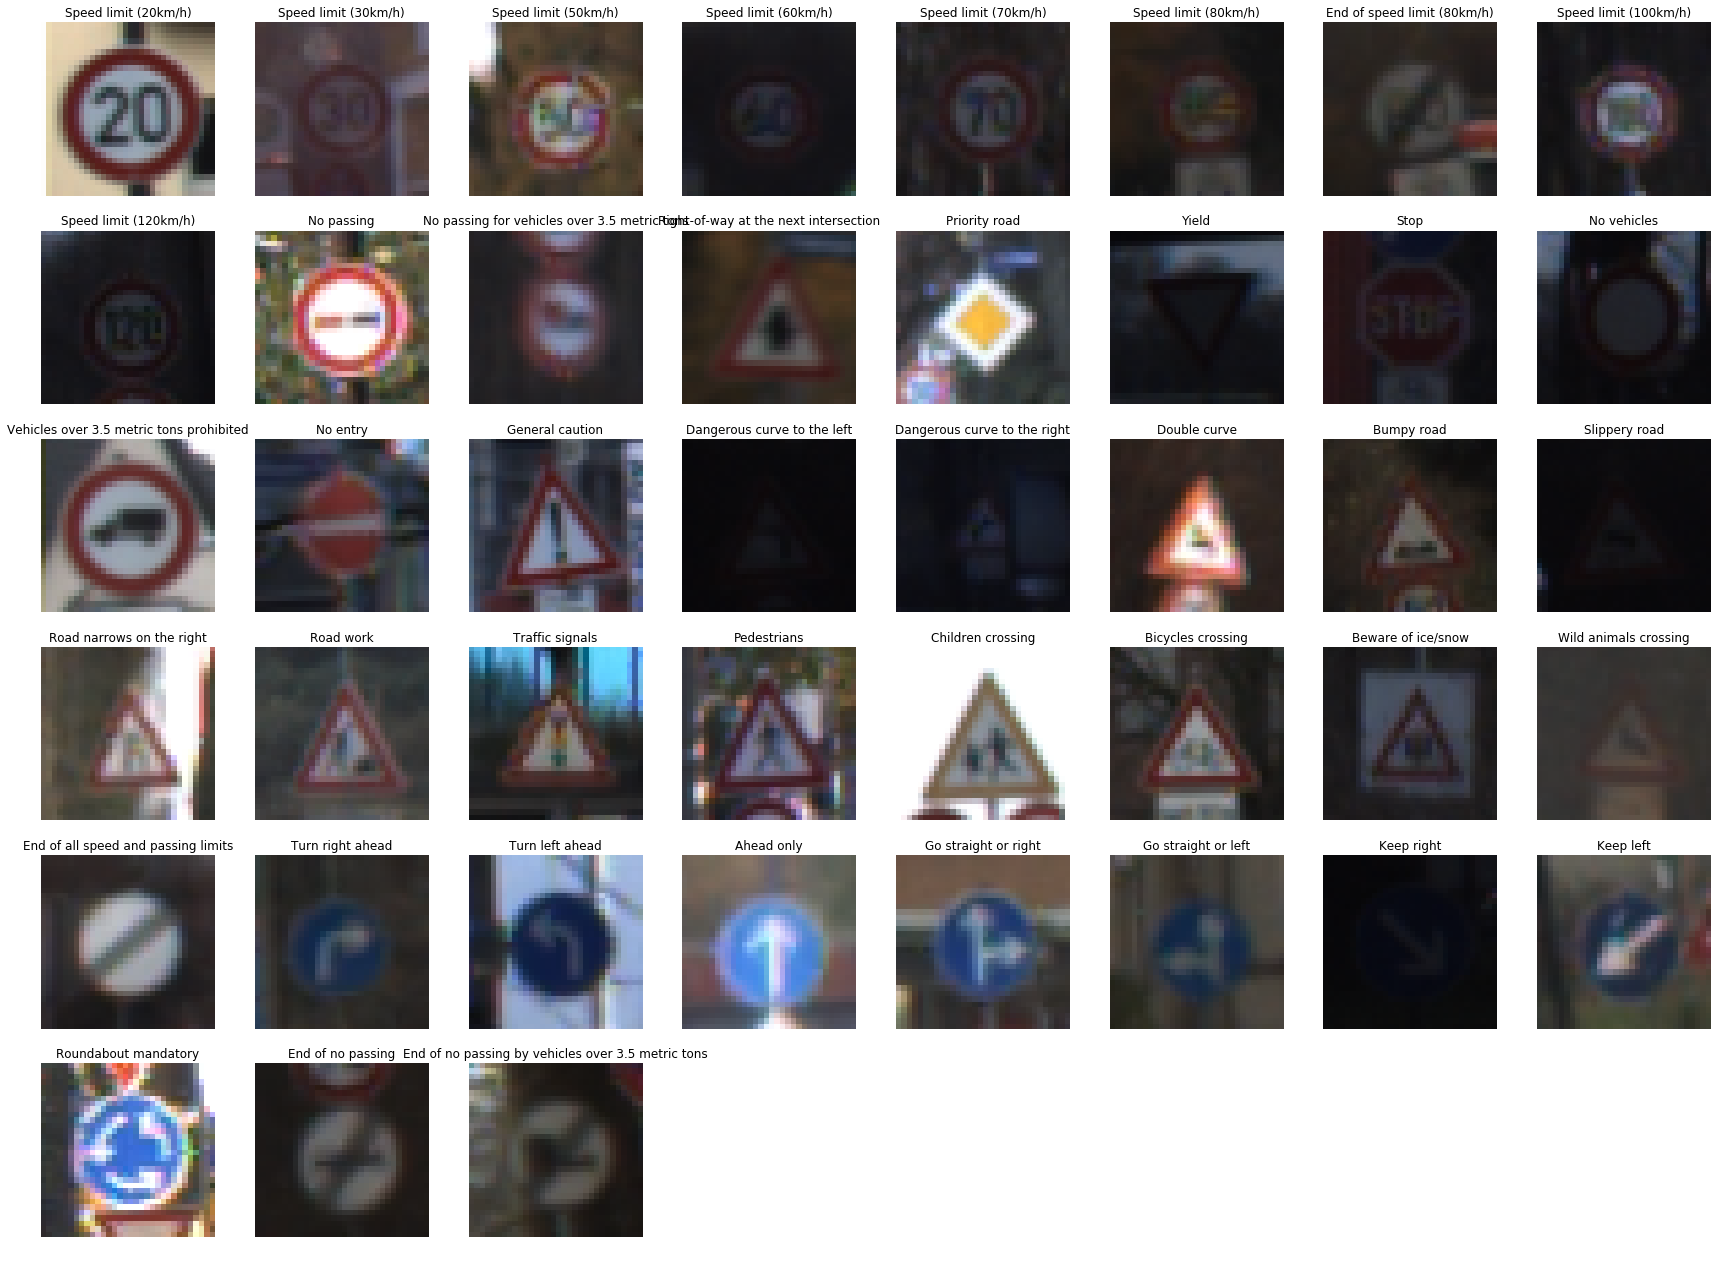

In [6]:
fig = plt.figure(figsize=(30, 30))

labels, unique_indices = np.unique(y_train, return_index=True)
labels_names = list(sign_names['SignName'])

for i, idx in enumerate(unique_indices):
    fig.add_subplot(8, 8, i+1)
    plt.axis('off')
    plt.imshow(X_train[idx])
    plt.title(labels_names[y_train[idx]])
plt.show()

Index 0. Sign name: Speed limit (20km/h). Number of signs: 180


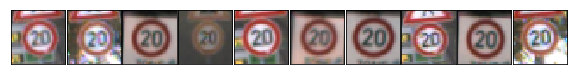

Index 1. Sign name: Speed limit (30km/h). Number of signs: 1980


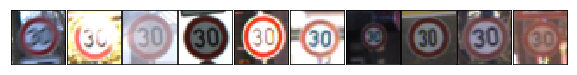

Index 2. Sign name: Speed limit (50km/h). Number of signs: 2010


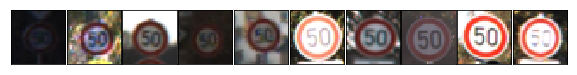

Index 3. Sign name: Speed limit (60km/h). Number of signs: 1260


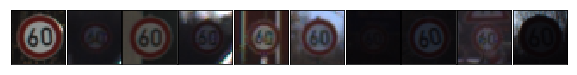

Index 4. Sign name: Speed limit (70km/h). Number of signs: 1770


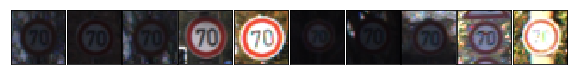

Index 5. Sign name: Speed limit (80km/h). Number of signs: 1650


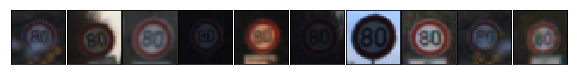

Index 6. Sign name: End of speed limit (80km/h). Number of signs: 360


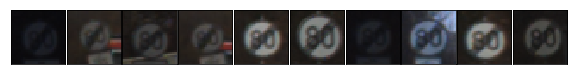

Index 7. Sign name: Speed limit (100km/h). Number of signs: 1290


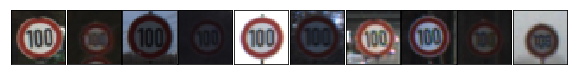

Index 8. Sign name: Speed limit (120km/h). Number of signs: 1260


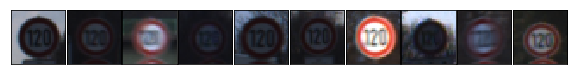

Index 9. Sign name: No passing. Number of signs: 1320


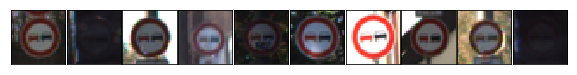

Index 10. Sign name: No passing for vehicles over 3.5 metric tons. Number of signs: 1800


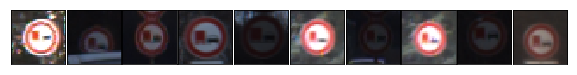

Index 11. Sign name: Right-of-way at the next intersection. Number of signs: 1170


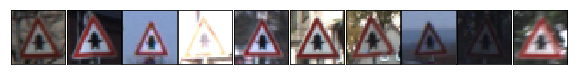

Index 12. Sign name: Priority road. Number of signs: 1890


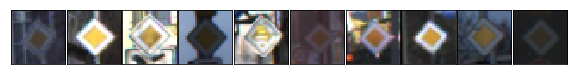

Index 13. Sign name: Yield. Number of signs: 1920


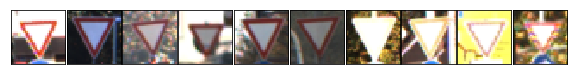

Index 14. Sign name: Stop. Number of signs: 690


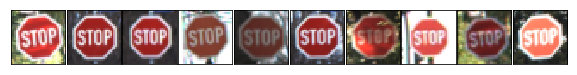

Index 15. Sign name: No vehicles. Number of signs: 540


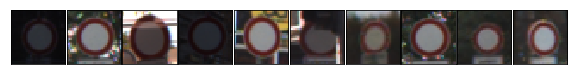

Index 16. Sign name: Vehicles over 3.5 metric tons prohibited. Number of signs: 360


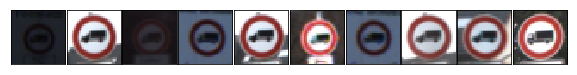

Index 17. Sign name: No entry. Number of signs: 990


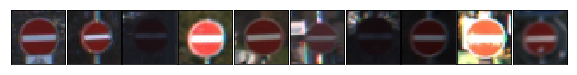

Index 18. Sign name: General caution. Number of signs: 1080


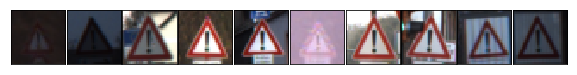

Index 19. Sign name: Dangerous curve to the left. Number of signs: 180


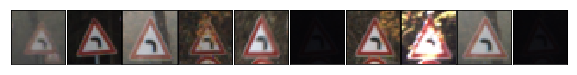

Index 20. Sign name: Dangerous curve to the right. Number of signs: 300


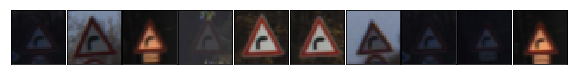

Index 21. Sign name: Double curve. Number of signs: 270


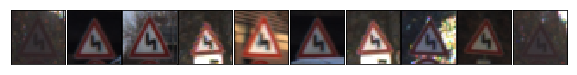

Index 22. Sign name: Bumpy road. Number of signs: 330


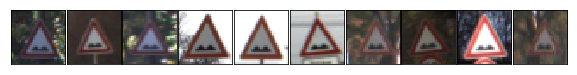

Index 23. Sign name: Slippery road. Number of signs: 450


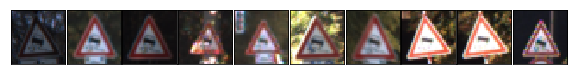

Index 24. Sign name: Road narrows on the right. Number of signs: 240


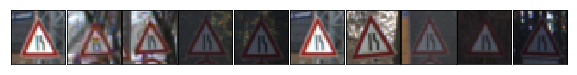

Index 25. Sign name: Road work. Number of signs: 1350


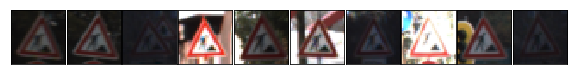

Index 26. Sign name: Traffic signals. Number of signs: 540


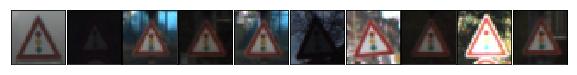

Index 27. Sign name: Pedestrians. Number of signs: 210


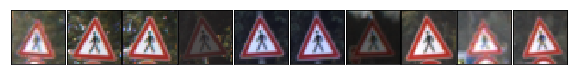

Index 28. Sign name: Children crossing. Number of signs: 480


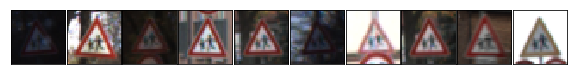

Index 29. Sign name: Bicycles crossing. Number of signs: 240


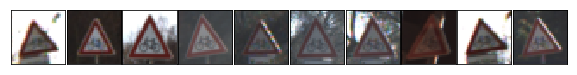

Index 30. Sign name: Beware of ice/snow. Number of signs: 390


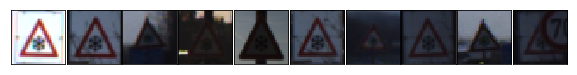

Index 31. Sign name: Wild animals crossing. Number of signs: 690


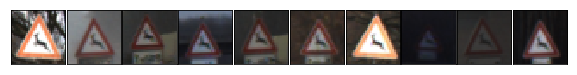

Index 32. Sign name: End of all speed and passing limits. Number of signs: 210


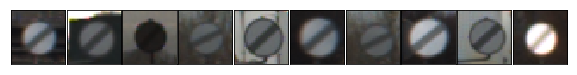

Index 33. Sign name: Turn right ahead. Number of signs: 599


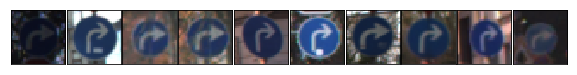

Index 34. Sign name: Turn left ahead. Number of signs: 360


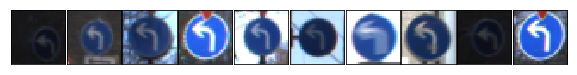

Index 35. Sign name: Ahead only. Number of signs: 1080


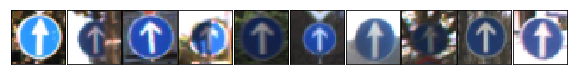

Index 36. Sign name: Go straight or right. Number of signs: 330


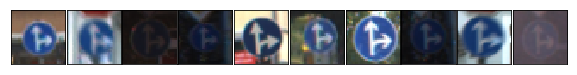

Index 37. Sign name: Go straight or left. Number of signs: 180


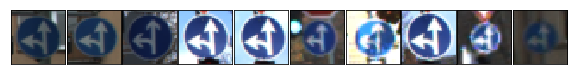

Index 38. Sign name: Keep right. Number of signs: 1860


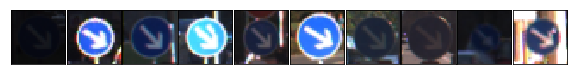

Index 39. Sign name: Keep left. Number of signs: 270


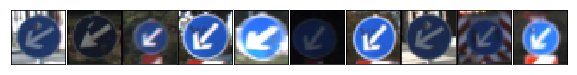

Index 40. Sign name: Roundabout mandatory. Number of signs: 300


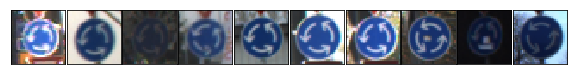

Index 41. Sign name: End of no passing. Number of signs: 210


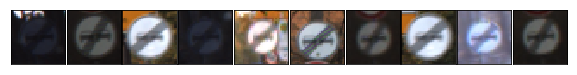

Index 42. Sign name: End of no passing by vehicles over 3.5 metric tons. Number of signs: 210


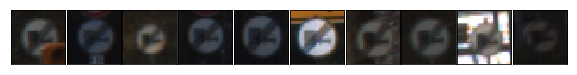

In [7]:
import random

def display_images(Xd, yd, labels_names, num_display=10, squeeze=False, cmap=None):
    samples_per_class = np.bincount(yd)
    for i, label in enumerate(labels_names):
        print("Index {0}. Sign name: {1}. Number of signs: {2}".format(i, label, samples_per_class[i]))
        samples = random.sample(list(np.where(yd==i)[0]), num_display)
        fig = plt.figure(figsize=(num_display, 1))
        fig.subplots_adjust(hspace=0, wspace=0)
        for j, idx in enumerate(samples):
            img = Xd[idx]
            axis = fig.add_subplot(1, num_display, j+1, xticks=[], yticks=[])
            if squeeze and cmap:
                axis.imshow(img.squeeze(), cmap=cmap)
            else:
                axis.imshow(img)
        plt.show()

display_images(X_train, y_train, labels_names)

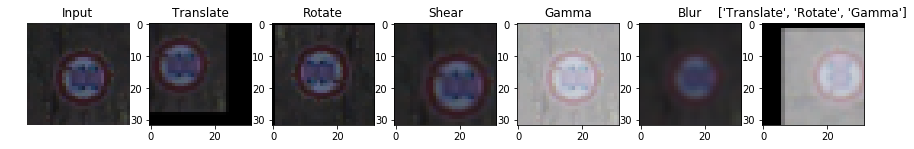

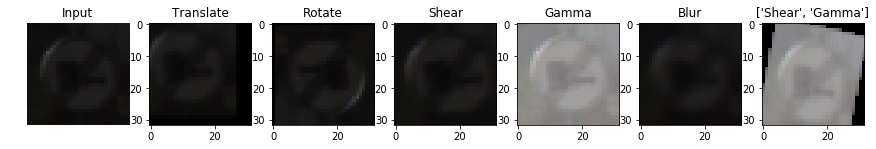

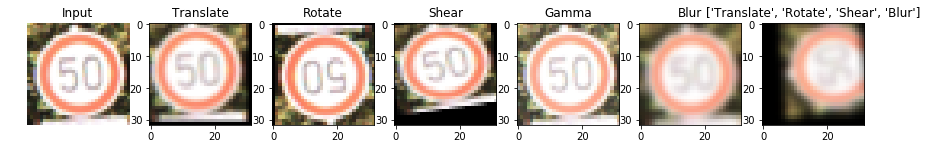

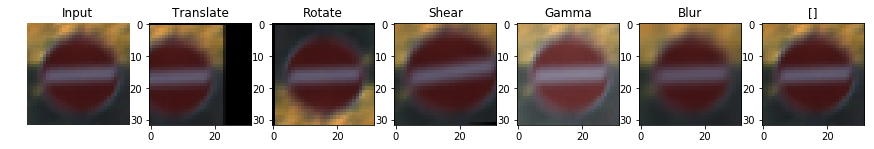

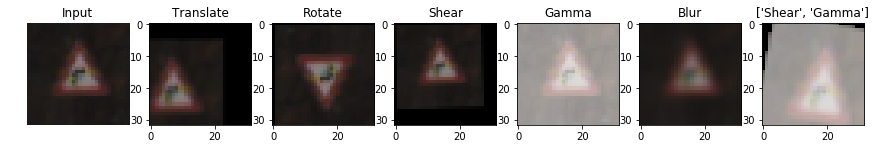

In [8]:
import cv2
from itertools import compress
class ImageEffect:
    """A combinations of image manipulation methods to augment dataset.
    
    The effects include: translation, rotation, shear, blur, gamma.
    Source: @eqbal, https://li8bot.wordpress.com/2014/07/21/opencvpythonpart3-geometric-transformations-2/
    
    Attributes:
        image: feed in the image that can be transformed
    """
    
    def randomize(self, image, show=False):
        """Randomize the effects on the input image
        """
        lottery = np.random.randint(0, 2, [5]).astype('bool')
        types = ["Translate", "Rotate", "Shear", "Blur", "Gamma"]
        
        if lottery[0]:
            image = self.translate(image)
        if lottery[1]:
            image = self.rotate(image)
        if lottery[2]:
            image = self.shear(image)
        if lottery[3]:
            image = self.blur(image)
        if lottery[4]:
            image = self.gamma(image)
            
        return list(compress(types, lottery)), image
    
    def translate(self, image, show=False):
        """Translate
        """
        y, x, channel = image.shape
        # Shift along the y-axis up to 30%. Shift along the x-axis up to 30%
        y_shift, x_shift = np.random.uniform(-0.3*y, 0.3*y), np.random.uniform(-0.3*x, 0.3*x)
        if show:
            print("y-axis:", y_shift, "x-axis:", x_shift)
        M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
        dst = cv2.warpAffine(image, M, (x, y))
        return dst
        
    def rotate(self, image, show=False, rotate_degree=90):
        """Rotate
        """
        y, x, channel = image.shape
        # Rotate it by 90 degrees anticlockwise. Scale factor = 1, similar to original
        # (x/2, y/2) : center of the rotation in the source image
        M = cv2.getRotationMatrix2D((x/2, y/2), rotate_degree, 1)
        if show:
            print(M)
        dst = cv2.warpAffine(image, M, (x, y))
        return dst
    
    def shear(self, image):
        """Shear. Keep parallel lines together.
        """
        y, x, channel = image.shape
        pts1 = np.float32([[5,5],[20,5],[5,20]])
        
        shear = np.random.randint(5, 15)
        target1 = 5 + shear * np.random.uniform() - shear/2
        target2 = 20 + shear * np.random.uniform() - shear/2
        pts2 = np.float32([[target1,5],[target2,target1],[5,target2]])
        
        # Calculates an affine transform from three pairs of the corresponding points
        # src – Coordinates of triangle vertices in the source image.
        # dst – Coordinates of the corresponding triangle vertices in the destination image.
        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(image, M, (x, y))
        return dst
    
    def blur(self, image):
        """Blur/Normalize
        """
        dst = cv2.GaussianBlur(image, (5, 5), 0)
        return dst
    
    def gamma(self, image, gamma=1.5, show=False):
        """Gamma Correction. Brighten the image. 
        
        Source : https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
        
        """
        if np.mean(image) < 50:
            gamma *= 3 # Triple gamma correction for dark images
        if show:
            print(np.mean(image), gamma)
        # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
        # All we need to do is scale the pixel intensities to the range [0, 1.0], apply the transform, and then scale back to the range [0, 255]
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

        # Apply gamma correction using the lookup table
        dst = cv2.LUT(image, table)
        return dst
    
transform = ImageEffect()
for _ in range(5):
    samp = X_train[np.random.randint(n_train)]
    dst_translate = transform.translate(samp)
    dst_rotate = transform.rotate(samp, rotate_degree=180)
    dst_shear = transform.shear(samp)
    dst_gamma = transform.gamma(samp)
    dst_gb = transform.blur(samp)
    random_types, dst_random = transform.randomize(samp)
    plt.figure(figsize=(15, 15))
    plt.subplot(171), plt.imshow(samp), plt.axis('off'), plt.title('Input')
    plt.subplot(172), plt.imshow(dst_translate), plt.title('Translate')
    plt.subplot(173), plt.imshow(dst_rotate), plt.title('Rotate')
    plt.subplot(174), plt.imshow(dst_shear), plt.title('Shear')
    plt.subplot(175), plt.imshow(dst_gamma), plt.title('Gamma')
    plt.subplot(176), plt.imshow(dst_gb), plt.title('Blur')
    plt.subplot(177), plt.imshow(dst_random), plt.title(random_types)
plt.show()

In [9]:
def augment_dataset(Xd, yd, scale_factor, output_path=None, shuffle=False, show=False):
    """Augment training dataset and pickle the file
    """
    n_classes = len(set(yd))
    class_idxs, images_per_class = np.unique(yd, return_counts=True)
    avg = np.ceil(np.mean(images_per_class, axis=0)).astype('uint32')
    if show:
        print("Average = ", avg)
    
    # Separate images into classes
    sep_data = []
    for idx in class_idxs:
        sep_data.append(Xd[yd==idx])
    
    expanded_Xd = np.array(np.zeros((1, 32, 32, 3)))
    expanded_yd = np.array([0])
    
    # For each class of image, calculate the number of new_images to add.
    # Then for each image, generate that many pseudo images
    transform = ImageEffect()
    for idx, orig_images in enumerate(sep_data):
        new_images = []
        factor = (scale_factor * (avg / len(orig_images))).astype('uint32')
        for img in orig_images:
            for _ in range(factor):
                new_images.append(transform.randomize(img)[1])
        if show:
            print("For class idx = {0}, factor = {1}, number of original images = {2}, number of new images added = {3}".format(idx, factor, len(orig_images), len(new_images)))
        if len(new_images) > 0:
            orig_images = np.concatenate((orig_images, new_images), axis=0)
        new_labels = np.full(len(orig_images), idx, dtype='uint8')
        expanded_Xd = np.concatenate((expanded_Xd, orig_images), axis=0)
        expanded_yd = np.concatenate((expanded_yd, new_labels), axis=0)
        
    if shuffle:
        from random import shuffle
        ind_list = [i for i in range(1, len(expanded_Xd))]
        shuffle(ind_list)
        return expanded_Xd[ind_list], expanded_yd[ind_list]
    else:
        return expanded_Xd[1:], expanded_yd[1:]  
    
expanded_X_train, expanded_y_train = augment_dataset(X_train, y_train, 2, show=True, shuffle=True)

Average =  810
For class idx = 0, factor = 9, number of original images = 180, number of new images added = 1620
For class idx = 1, factor = 0, number of original images = 1980, number of new images added = 0
For class idx = 2, factor = 0, number of original images = 2010, number of new images added = 0
For class idx = 3, factor = 1, number of original images = 1260, number of new images added = 1260
For class idx = 4, factor = 0, number of original images = 1770, number of new images added = 0
For class idx = 5, factor = 0, number of original images = 1650, number of new images added = 0
For class idx = 6, factor = 4, number of original images = 360, number of new images added = 1440
For class idx = 7, factor = 1, number of original images = 1290, number of new images added = 1290
For class idx = 8, factor = 1, number of original images = 1260, number of new images added = 1260
For class idx = 9, factor = 1, number of original images = 1320, number of new images added = 1320
For class

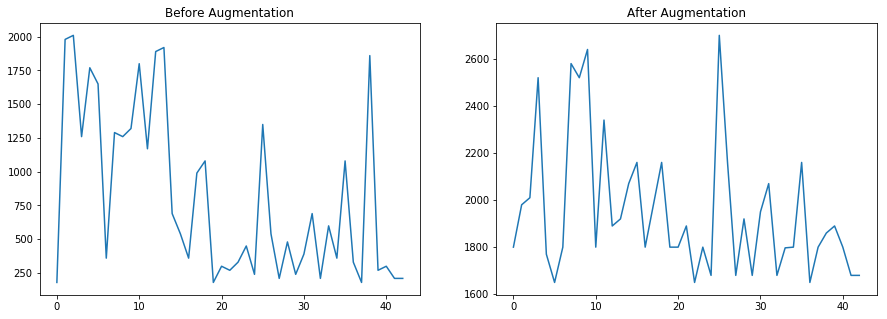

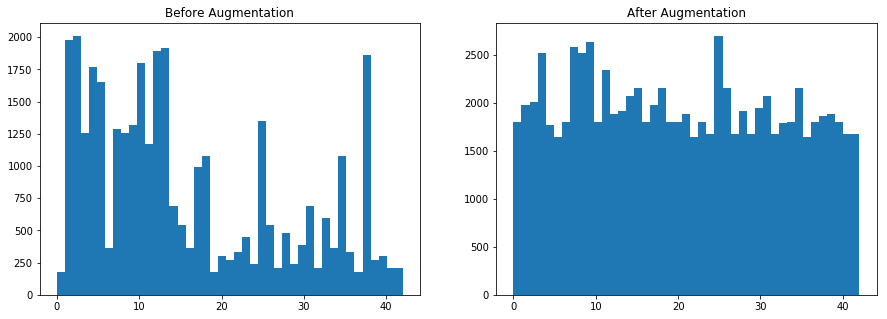

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.plot(np.bincount(y_train)), plt.title('Before Augmentation')
plt.subplot(122), plt.plot(np.bincount(expanded_y_train)), plt.title('After Augmentation')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.hist(y_train, bins=n_classes), plt.title('Before Augmentation')
plt.subplot(122), plt.hist(expanded_y_train, bins=n_classes), plt.title('After Augmentation')
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import copy
import torch.utils.data as data_utils

traffic_train = data_utils.TensorDataset(torch.from_numpy(np.transpose(expanded_X_train, (0,3,1,2))), torch.from_numpy(expanded_y_train))
loader_train = data_utils.DataLoader(traffic_train, batch_size=64, shuffle=True)
traffic_val = data_utils.TensorDataset(torch.from_numpy(np.transpose(X_valid, (0,3,1,2))), torch.from_numpy(y_valid))
loader_val = data_utils.DataLoader(traffic_val, batch_size=64, shuffle=True)
traffic_test = data_utils.TensorDataset(torch.from_numpy(np.transpose(X_test, (0,3,1,2))), torch.from_numpy(y_test))
loader_test = data_utils.DataLoader(traffic_test, batch_size=64, shuffle=True)

In [33]:
use_gpu = torch.cuda.is_available()
print_every = 100
def reset(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()
        
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        # print(N, C, H, W)
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [34]:
lenet = nn.Sequential(
    nn.Conv2d(3, 6, kernel_size=5),
    nn.ReLU(inplace=True),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(16),
    nn.MaxPool2d(2, stride=2),
    Flatten(),
    nn.Linear(16*12*12, 120),
    nn.ReLU(inplace=True),
    nn.Linear(120, 84),
    nn.ReLU(inplace=True),
    nn.Linear(84, n_classes))

lenet(Variable(torch.randn(64, 3, 32, 32))).size()

torch.Size([64, 43])

In [35]:
def train(model, loss_fn, optimizer, num_epochs = 1, plot=True):
    reset(model)
    best_acc = 0.0
    best_model = model
    
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        model.train()
        
        running_loss = 0.0
        running_corrects = 0
        losses = []
        accuracies = []
        num_samples = 0
            
        for t, (x, y) in enumerate(loader_train):
            x_var = Variable(x.float())
            y_var = Variable(y.long())
            
            scores = model(x_var)
            _, preds = torch.max(scores.data, 1)
            loss = loss_fn(scores, y_var)
            
            batch_size = preds.size(0)
            batch_loss = loss.data[0]
            batch_corrects = torch.sum(preds == y_var.data)
            batch_acc = batch_corrects / batch_size
            
            losses.append(batch_loss)
            accuracies.append(batch_acc)
            running_loss += batch_loss * batch_size
            running_corrects += batch_corrects
            
            num_samples += batch_size
            
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f, acc = %.4f' % (t + 1, batch_loss, batch_acc))
            
            if phase == "train":
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        epoch_loss = running_loss / num_samples
        epoch_acc = running_corrects / num_samples

        print('Phase {}, Epoch {}, Overall Loss: {:.4f} and Accuracy: {:.4f}'.format(phase, epoch+1, epoch_loss, epoch_acc))

        if phase == "train" and plot:
            fig, ax = plt.subplots(figsize=(10, 5))
            plt.grid(True)

            line1, = ax.plot(losses, label='Losses')
            line2, = ax.plot(accuracies, label='Accuracy')

            ax.legend(loc='lower right')
            plt.title('Epoch {} Loss'.format(epoch+1))
            plt.xlabel('Minibatch Number')
            plt.show()
        
        if phase == "val" and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model = copy.deepcopy(model) # Update the best model
            print('Phase {}, Epoch {}, Best Accuracy So Far: {:.4f}'.format(phase, epoch+1, epoch_acc))
            
    return best_model

Starting epoch 1 / 1
t = 100, loss = 3.7365, acc = 0.0469
t = 200, loss = 3.7018, acc = 0.0625
t = 300, loss = 3.6308, acc = 0.1094
t = 400, loss = 3.4506, acc = 0.1406
t = 500, loss = 3.2509, acc = 0.2500
t = 600, loss = 3.1265, acc = 0.1719
t = 700, loss = 2.9116, acc = 0.2344
t = 800, loss = 2.8228, acc = 0.2031
t = 900, loss = 2.6858, acc = 0.2188
t = 1000, loss = 2.4841, acc = 0.3906
t = 1100, loss = 2.5213, acc = 0.3125
t = 1200, loss = 2.3574, acc = 0.3438
t = 1300, loss = 2.2648, acc = 0.4062
Epoch 1, Overall Loss: 3.0523 and Accuracy: 0.2030
Validation:
Got 2752 / 4410 correct (62.40)


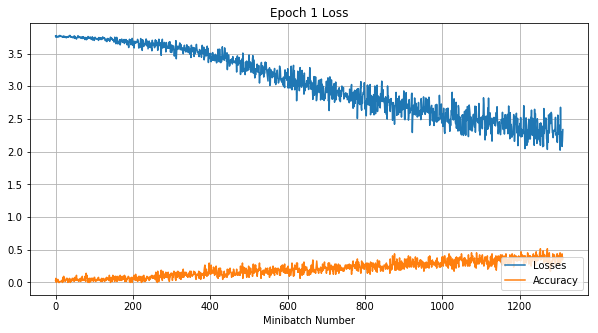

In [36]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet.parameters(), lr=0.001, momentum=0.9, dampening=0, weight_decay=0.0005, nesterov=True)
best_model = train(lenet, loss_fn, optimizer, num_epochs=1)